## IMPORTING REQUIRED LIBRARIES AND PREPARING DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Here we are reading the csv files of the training data set and the testing data set and storing the result inside the train_df , test_df variables respectively as pandas dataframe.

In [0]:
train_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mini Project/fashion-mnist_train.csv" , sep = ",")
test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mini Project/fashion-mnist_test.csv", sep = ",")

## VISUALISING THE MODEL

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.shape , test_df.shape

((60000, 785), (10000, 785))

CONVERTING THE PANDAS DATAFRAME ( BOTH TRAINING AND TESTING ) TO NUMPY ARRAYS.

In [0]:
train = np.array(train_df , dtype="float32" )

In [0]:
test = np.array(test_df , dtype="float32" )

An random image from the dataset is shown here with its label.

In [0]:
import random

Label is :-->  2.0


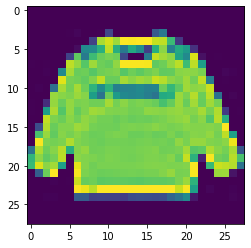

In [9]:
i = random.randint(1, 60000)
plt.imshow( train[i , 1: ].reshape(28,28))
label = train[i,0]
print("Label is :--> ",label)

In [0]:
#Labels of all the classes are given below -->
#1--> Trouser
#2--> Pullover
#3--> Dress
#4--> Coat
#5--> Sandal
#6--> Shirt
#7--> Sneaker
#8--> Bag
#9--> Ankle Boot

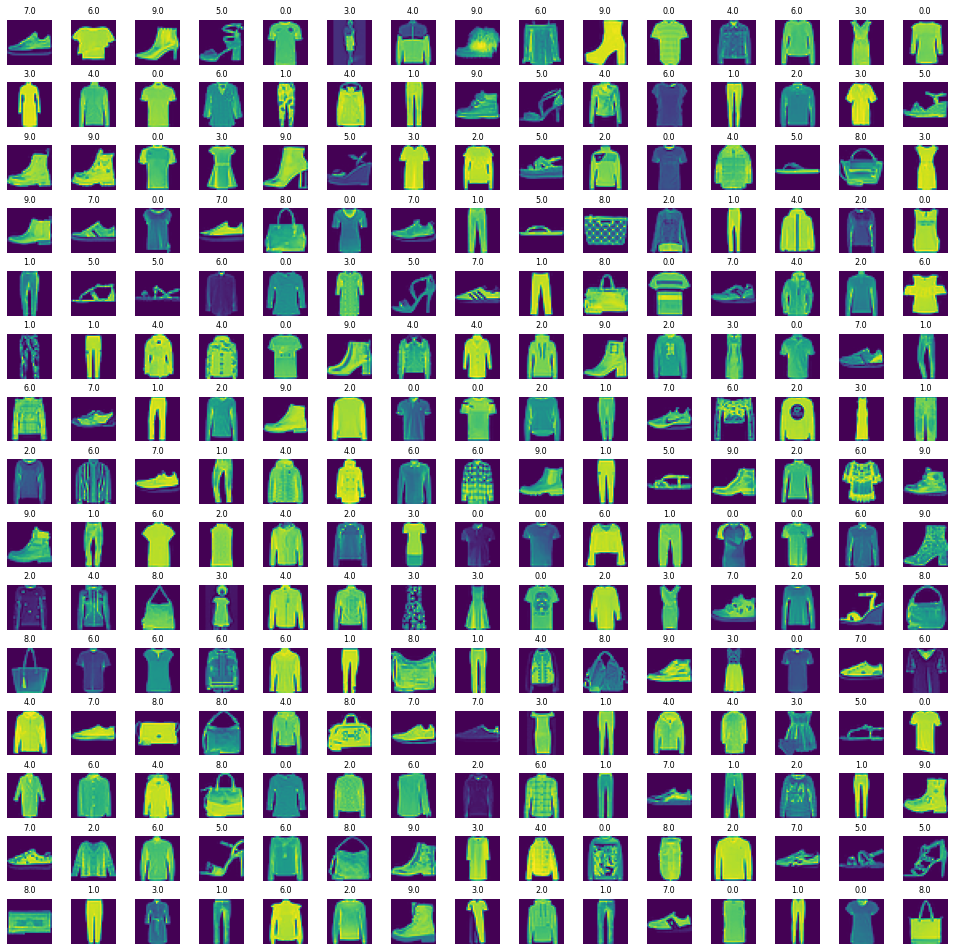

In [11]:
# view all the images in grid format
# Define the dimension of the plot grid
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17) )

axes = axes.ravel() # Flatten the 15x15 matrix into 255 array.

n_train = len(train) # Get the length of training dataset.

for i in np.arange(0, (W_grid*L_grid) ):# Create evenly spaces variables
   
   # select a random number
   index = np.random.randint(0, n_train)
   # read and display the image with selected index
   axes[i].imshow( train[index, 1:].reshape((28,28)) )
   axes[i].set_title(train[index, 0], fontsize = 8)
   axes[i].axis("off")

plt.subplots_adjust(hspace = 0.4)   


##TRAINING THE MODEL

Here we are splitting out dataset into train, test sets.

In [0]:
x_train = train[:, 1: ]/255
y_train = train[:, 0]

In [0]:
x_test = test[:, 1:]/255
y_test = test[:, 0]

In [0]:
from sklearn.model_selection import train_test_split

 Here we are splitting the training set into training and validation set at a ratio 8:2. 

In [0]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1234 )

 Here we are reshaping our image datasets from (784x1) to (28x28) so that we can feed this array to the Convolutional Neural Network.

In [0]:
x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28,28,1) )

In [32]:
x_train.shape , x_test.shape , x_validate.shape

((38400, 28, 28, 1), (10000, 28, 28, 1), (9600, 28, 28, 1))

In [18]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
cnn_model = Sequential()

In [21]:
# Input shape = 28x28
# Total no of features = 100
# feature_matrix(kernel) size = (3,3)
# Activation Function = RELU
cnn_model.add( Conv2D( 100, 3, 3, input_shape = (28,28,1), activation="relu" ))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """


In [0]:
# MaxPooling
cnn_model.add(MaxPooling2D(pool_size=(2,2) ) )

In [0]:
# Flattening
cnn_model.add(Flatten() )

In [24]:
# Hidden layer
cnn_model.add(Dense(output_dim = 100, activation="relu"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100)`
  


In [25]:
# Output layer
cnn_model.add(Dense(output_dim = 10, activation="sigmoid"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [0]:
# Compile The Model
# Loss function is taken as "sparse_categorical_crossentropy" becoz output has values 0 to 9.
cnn_model.compile( loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"] )

In [0]:
epochs = 50

In [33]:
cnn_model.fit(
    x_train,
    y_train,
    batch_size = 100,
    nb_epoch = epochs,
    verbose = 1,
    validation_data = (x_validate, y_validate)
)

Train on 38400 samples, validate on 9600 samples
Epoch 1/50
  100/38400 [..............................] - ETA: 40s - loss: 0.3623 - accuracy: 0.8900

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


38400/38400 [==============================] - 41s 1ms/step - loss: 0.2831 - accuracy: 0.8987 - val_loss: 0.2788 - val_accuracy: 0.8992
Epoch 2/50
38400/38400 [==============================] - 41s 1ms/step - loss: 0.2468 - accuracy: 0.9113 - val_loss: 0.2657 - val_accuracy: 0.9013
Epoch 3/50
38400/38400 [==============================] - 40s 1ms/step - loss: 0.2265 - accuracy: 0.9184 - val_loss: 0.2523 - val_accuracy: 0.9102
Epoch 4/50
38400/38400 [==============================] - 40s 1ms/step - loss: 0.2026 - accuracy: 0.9260 - val_loss: 0.2573 - val_accuracy: 0.9094
Epoch 5/50
38400/38400 [==============================] - 40s 1ms/step - loss: 0.1816 - accuracy: 0.9348 - val_loss: 0.2569 - val_accuracy: 0.9080
Epoch 6/50
38400/38400 [==============================] - 41s 1ms/step - loss: 0.1676 - accuracy: 0.9388 - val_loss: 0.2531 - val_accuracy: 0.9115
Epoch 7/50
38400/38400 [==============================] - 40s 1ms/step - loss: 0.1523 - accuracy: 0.9445 - val_loss: 0.2611 - val

## EVALUATIG THE MODEL

In [0]:
evaluation = cnn_model.evaluate(x_test, y_test)
print("Test Accuracy : {: .3f}".format(evaluation[1]))

In [0]:
evaluation

In [0]:
predicted_classes = cnn_model.predict_classes(x_test)

In [0]:
predicted_classes 

In [0]:
predicted_classes.shape

In [0]:
# view all the images in grid format
# Define the dimension of the plot grid
W = 5
L = 5
fig, axes = plt.subplots(L, W, figsize = (12,12) )
axes = axes.ravel() # Flatten the 15x15 matrix into 255 array.

for i in np.arange(0, (L*W) ):# Create evenly spaces variables
   axes[i].imshow( x_test[i].reshape((28,28)) )
   axes[i].set_title(" Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
   axes[i].axis("off")

plt.subplots_adjust(hspace = 0.5)   


In [0]:
predicted_classes = cnn_model.predict_classes(x_test)

In [0]:
predicted_classes

## My Prediction 

In [0]:
array = [254,248,254,250,254,254,254,249,246,254,254,248,254,254,254,253,255,255,255,255,255,255,255,255,255,255,255,255,254,249,254,254,254,243,251,254,254,254,254,254,254,244,244,254,255,255,255,255,255,255,255,255,255,255,255,255,254,254,251,249,249,254,254,254,254,249,246,254,254,254,252,254,255,255,255,255,255,255,255,255,255,255,255,255,251,254,254,254,254,254,254,252,252,254,254,253,251,254,254,250,255,255,255,255,255,255,255,255,255,255,255,255,249,254,254,254,254,251,246,254,253,254,254,254,245,248,254,248,255,255,255,255,255,255,255,255,255,255,255,255,252,254,229,170,215,254,254,253,254,223,224,253,254,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,254,254,212,109,172,226,254,244,222,171,171,213,235,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,254,248,234,153,182,149,206,250,152,142,162,178,174,206,248,251,255,255,255,255,255,255,255,255,255,255,255,255,251,254,239,186,108,81,139,184,176,153,154,172,160,144,184,252,250,253,255,255,252,251,254,255,254,255,255,254,254,252,205,158,118,106,139,161,168,164,158,153,153,157,161,163,245,255,255,250,252,255,255,242,255,255,255,255,253,247,192,159,158,150,149,144,136,156,162,148,144,155,152,136,181,214,247,255,255,255,255,255,255,255,255,255,254,251,177,134,145,147,147,148,130,138,148,152,151,153,160,168,138,155,202,254,255,248,245,255,253,251,251,252,254,246,173,136,149,145,137,134,154,138,135,149,160,160,162,170,164,143,157,214,255,255,246,245,255,255,252,252,252,223,154,134,152,151,144,134,144,148,151,151,151,154,155,155,169,155,150,172,214,250,255,255,255,255,255,255,254,211,141,122,126,131,150,154,130,148,161,156,147,146,147,148,148,157,161,162,174,203,235,253,246,252,255,255,251,226,199,198,175,144,142,133,150,141,142,154,161,153,141,135,156,155,162,170,165,156,166,186,229,241,253,255,252,235,221,225,233,218,179,144,147,146,147,150,154,154,150,146,148,152,155,155,153,154,158,163,147,204,252,255,255,233,208,200,209,220,220,216,152,159,163,157,148,145,153,163,156,145,135,137,149,157,156,150,151,192,237,255,255,245,227,213,209,213,218,222,202,176,148,142,154,165,161,152,166,167,166,160,152,143,138,135,177,199,231,255,255,255,255,248,234,220,210,205,214,204,189,172,158,151,151,152,140,141,136,127,119,125,144,160,210,225,243,253,255,255,255,255,252,247,243,241,222,224,220,206,184,165,155,151,158,157,162,177,196,213,220,221,212,239,255,253,255,253,253,254,255,255,255,255,237,226,215,216,227,236,236,232,229,227,221,208,190,172,157,149,196,233,255,255,255,255,255,255,255,254,250,247,255,255,246,216,182,161,158,164,137,135,125,107,96,108,139,166,206,232,255,255,255,255,255,254,254,255,255,255,255,253,254,255,255,238,207,181,157,156,158,165,178,193,207,214,234,242,253,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255]

In [0]:
mydataset = np.array([array])

In [0]:
mydataset.shape

In [0]:
mydataset = mydataset[:, 0:]/255

In [0]:
mydataset =mydataset.reshape(1,28,28,1)

In [0]:
my_class = cnn_model.predict_classes(mydataset)

In [0]:
my_class